In [14]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Import data

In [15]:
#topStared=pd.read_csv('../data/TopStaredRepositories.csv', sep=",")
commits=pd.read_csv('../data/commitsTopStaredRepositories.csv', sep=",")
#react=pd.read_csv('../data/reactSampleCommits.csv', sep=",")

## Data Info

In [16]:
commits.head(3)

,Owner,Repository-Name,numCommits,totalTimeToCompute
0,freeCodeCamp,freeCodeCamp,33818,15124.096394
1,twbs,bootstrap,22580,17594.706774
2,EbookFoundation,free-programming-books,8396,17504.325867


In [17]:
commits.shape

(980, 4)

In [18]:
commits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Owner               980 non-null    object 
 1   Repository-Name     980 non-null    object 
 2   numCommits          980 non-null    int64  
 3   totalTimeToCompute  980 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 30.8+ KB


In [19]:
commits.isnull().sum()

Owner                 0
Repository-Name       0
numCommits            0
totalTimeToCompute    0
dtype: int64

###  Unique data

In [20]:

unique_value_counts = commits.nunique()
print(unique_value_counts)

Owner                 814
Repository-Name       973
numCommits            885
totalTimeToCompute    980
dtype: int64


## commits

In [21]:
commits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Owner               980 non-null    object 
 1   Repository-Name     980 non-null    object 
 2   numCommits          980 non-null    int64  
 3   totalTimeToCompute  980 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 30.8+ KB


In [22]:
commits.head(3)

,Owner,Repository-Name,numCommits,totalTimeToCompute
0,freeCodeCamp,freeCodeCamp,33818,15124.096394
1,twbs,bootstrap,22580,17594.706774
2,EbookFoundation,free-programming-books,8396,17504.325867


In [23]:
#'Commits Unique values
unique_value_counts = commits.nunique()
# Display the number of unique values for each column
print(unique_value_counts)

Owner                 814
Repository-Name       973
numCommits            885
totalTimeToCompute    980
dtype: int64


In [24]:
# Owner Analysis
owner_counts = commits['Owner'].value_counts()
print("Repository count per owner:")
owner_counts 

Repository count per owner:


facebook        20
google          20
angular          7
Microsoft        5
sindresorhus     5
                ..
prettier         1
kilimchoi        1
ipython          1
ccgus            1
lhc70000         1
Name: Owner, Length: 814, dtype: int64

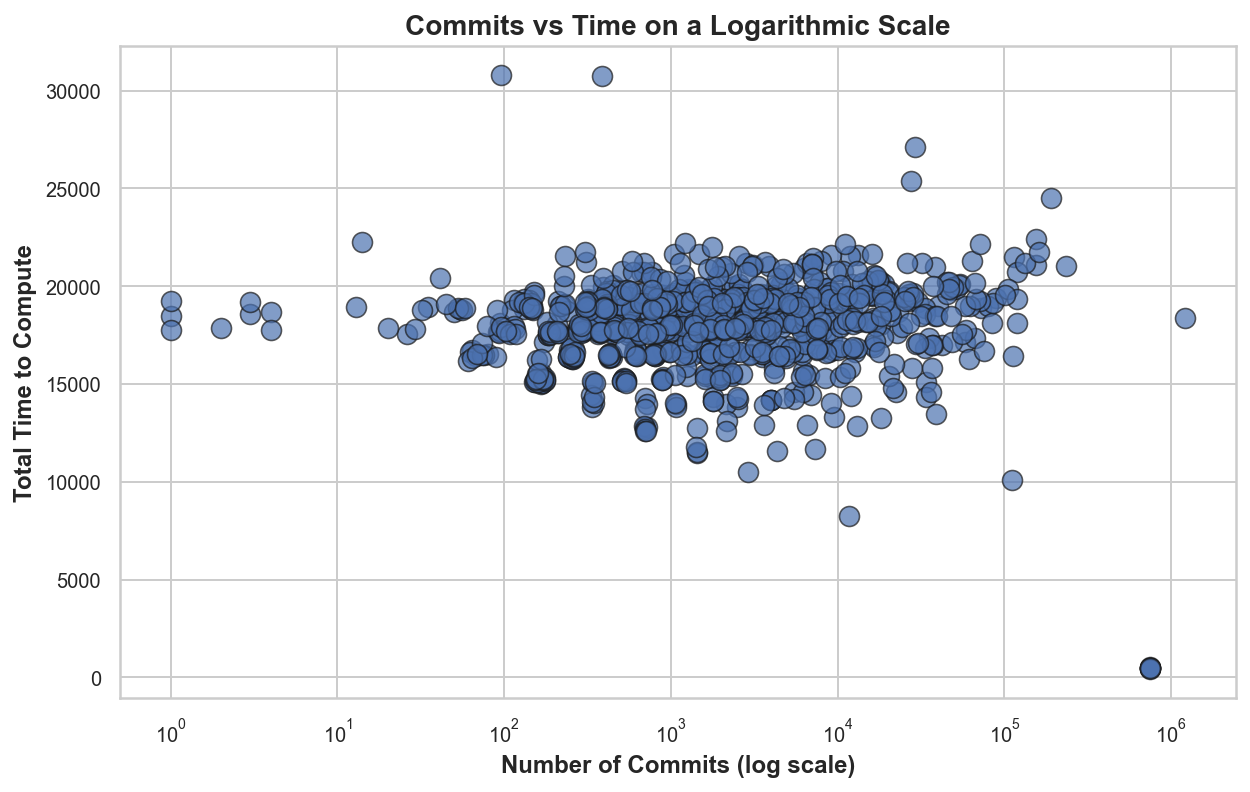

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style for a cleaner look
sns.set(style="whitegrid")

# Create a larger figure size for better visibility
plt.figure(figsize=(10, 6))

# Create the scatter plot
ax = sns.scatterplot(data=commits, x='numCommits', y='totalTimeToCompute', 
                     palette="viridis", s=100, alpha=0.7, edgecolor="k")

# Set the x-axis to a logarithmic scale
ax.set_xscale('log')

# Customize the plot with titles and labels
plt.xlabel('Number of Commits (log scale)', fontsize=12, fontweight='bold')
plt.ylabel('Total Time to Compute', fontsize=12, fontweight='bold')
plt.title('Commits vs Time on a Logarithmic Scale', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Enhance readability with grid
#plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Show the plot
plt.show()


In [28]:
commits

,Owner,Repository-Name,numCommits,totalTimeToCompute
0,freeCodeCamp,freeCodeCamp,33818,15124.096394
1,twbs,bootstrap,22580,17594.706774
2,EbookFoundation,free-programming-books,8396,17504.325867
3,facebook,react,15980,19504.009008
4,d3,d3,4468,16456.093788
...,...,...,...,...
975,chrisjenx,Calligraphy,309,18944.689035
976,eliangcs,http-prompt,391,20439.028978
977,robertdavidgraham,masscan,706,12597.419500
978,ElemeFE,mint-ui,304,19190.901995


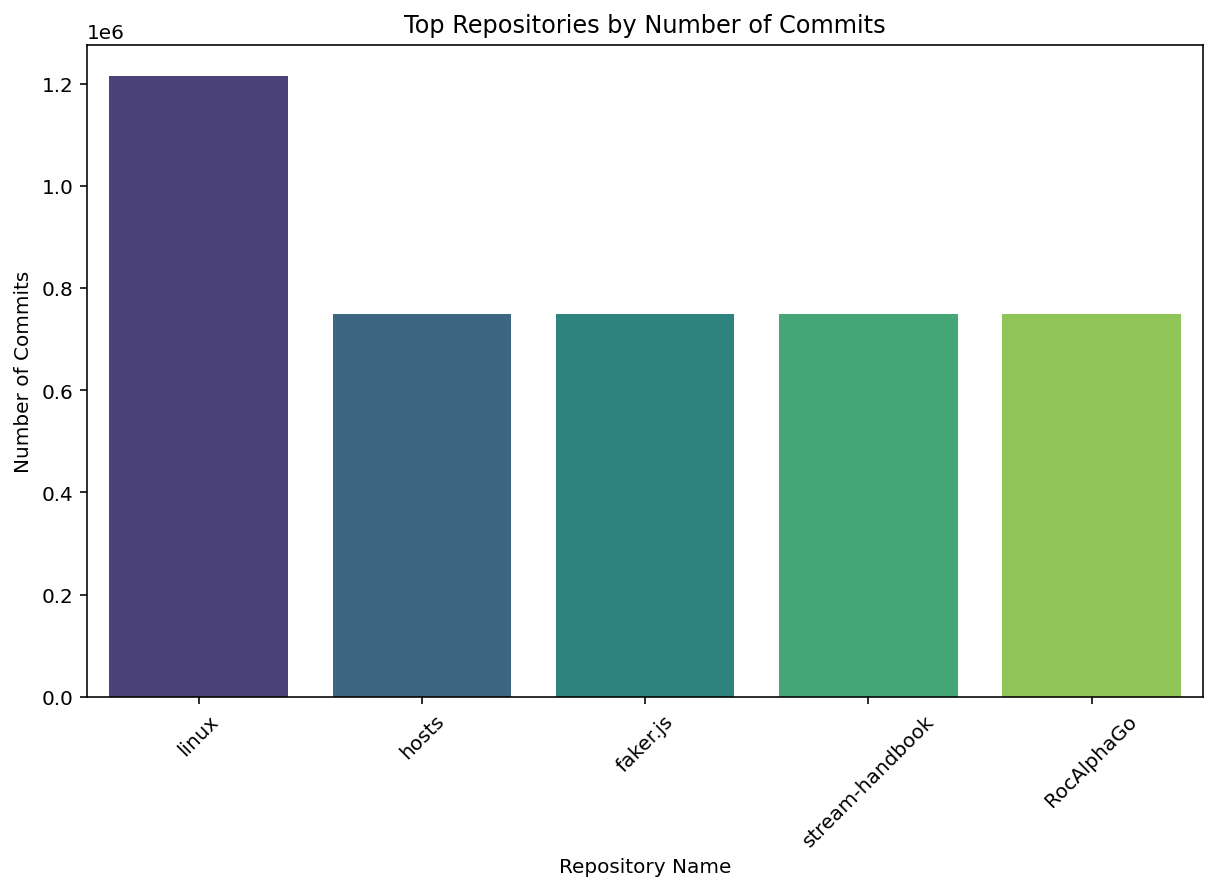

In [26]:
top_repositories = commits.nlargest(5, 'numCommits')

# Plotting the top repositories by number of commits
plt.figure(figsize=(10, 6))
sns.barplot(data=top_repositories, x='Repository-Name', y='numCommits', palette='viridis')
plt.title('Top Repositories by Number of Commits')
plt.xlabel('Repository Name')
plt.ylabel('Number of Commits')
plt.xticks(rotation=45)  
plt.show()

Text(0.5, 1.0, 'Distribution of Total Time to Compute')

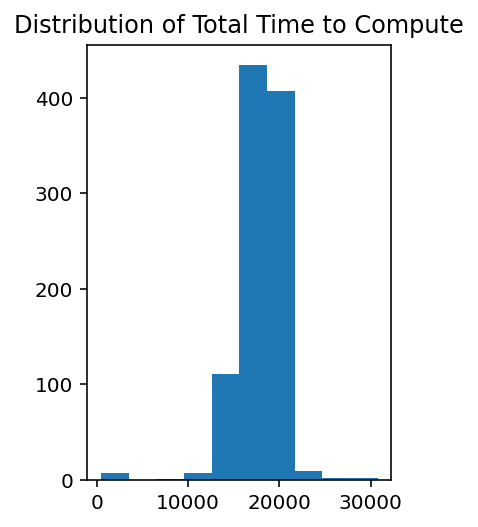

In [27]:
plt.subplot(1, 2, 2)
plt.hist(commits['totalTimeToCompute'], bins=10)
plt.title('Distribution of Total Time to Compute')
